In [7]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

class Perceptron(object):
  def __init__(self,eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter=n_iter
    self.random_state = random_state

  def fit1(self, x, y):
    rgen=np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[0])
    self.errors1_= []

    for _ in range(self.n_iter):
      errors = 0
      for xi ,target in zip(X,y):
        update= self.eta *(target-self.predict1(xi))
        self.w_[1:] += update *xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors1_.append(errors)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:])+ self.w_[0]

  def predict1(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter=n_iter
    self.random_state=random_state
  def fit(self, X, y):
    self.errors_=[[]]
    err=[]
    self.perceptrons =[]
    for i in range(self.n_iter):
      self.perceptrons.append(Perceptron())
      self.perceptrons[i].fit1(X[i],y[i])
      err.append(np.array(self.perceptrons[i].errors1_))
    self.errors_=sum(err)
    return self
  def predict(self, X):
    arr=[]
    for i in range(self.n_iter):
      arr.append(self.perceptrons[i].predict1(X))
    return arr
  def misclassified(self,X,y):
    tmp=0
    for i in range(self.n_iter):
      y_pred= self.perceptrons[i].predict1(X)
      y_i=y[i]
      for j in range(self.n_iter):
        if y_pred[j]!=y_i[j]:
          tmp+=1
    return tmp
  def show(self,X):        
      fig, ax = plt.subplots(nrows=2, ncols=int(X.shape[0]/2),figsize=(10,10), sharex=True, sharey=True)
      ax = ax.flatten()
      for i in range(X.shape[0]): 
        img = X[i].reshape(7,5)
        ax[i].imshow(img,cmap='Greys')

In [9]:
set=[4,7,8,9,13,15,20,22,24,25]

uploaded = files.upload()

net=SLP()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']),header=None)
df.head(1)
X = df.iloc[set,:35].values
print(X)

Saving letters.data to letters (1).data
[[ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1  1 -1 -1 -1  1  1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1
   1  1 -1  1 -1  1 -1  1 -1  1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -

In [10]:
set1=set
set1=np.array(set1)
set1+=35
y = df.iloc[set,set1].values
print(y)

[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]]


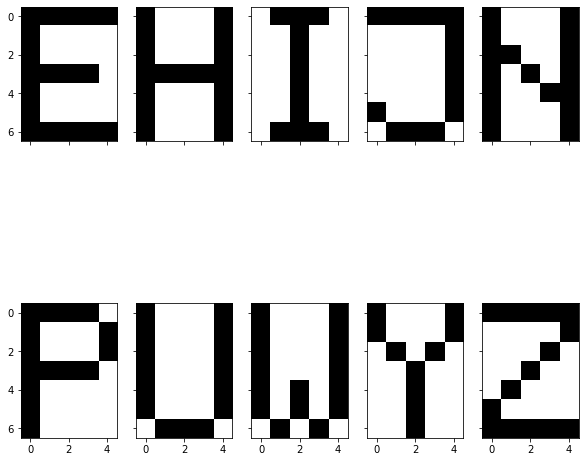

In [11]:
net.show(X)

In [12]:
net.fit(X,y)

In [13]:
net.errors_

array([32, 11,  3,  1,  1,  0,  0,  0,  0,  0])

In [14]:
net.predict(X)



[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [15]:
net.misclassified(X,y)

0

In [16]:
def damage(X,percent,seed=1):
  rgen= np.random.RandomState(seed)
  result = np.array(X)
  count= int(X.shape[1]*percent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel]*=-1
  return result

In [17]:
damaged5=damage(X,5)
damaged15=damage(X,15)
damaged40=damage(X,40)

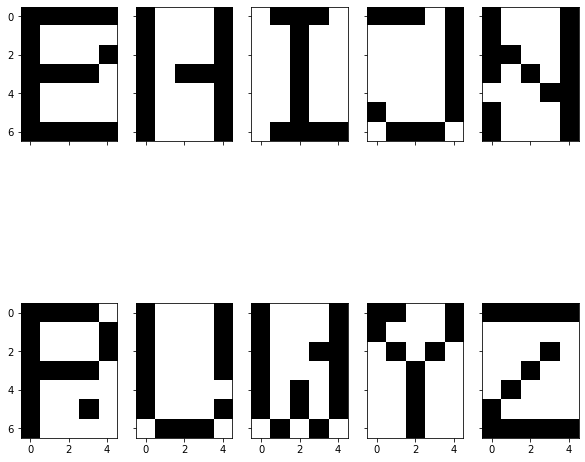

In [18]:
net.show(damaged5)

In [19]:
net.predict(damaged5)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [20]:
net.misclassified(damaged5,y)

1

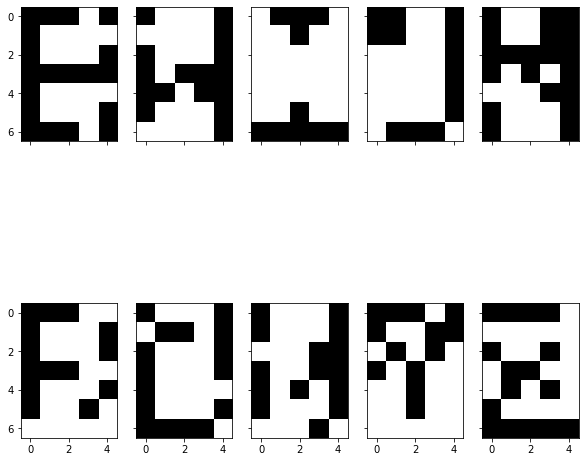

In [21]:
net.show(damaged15)

In [22]:
net.predict(damaged15)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 1,  1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1,  1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])]

In [23]:
net.misclassified(damaged15,y)

9

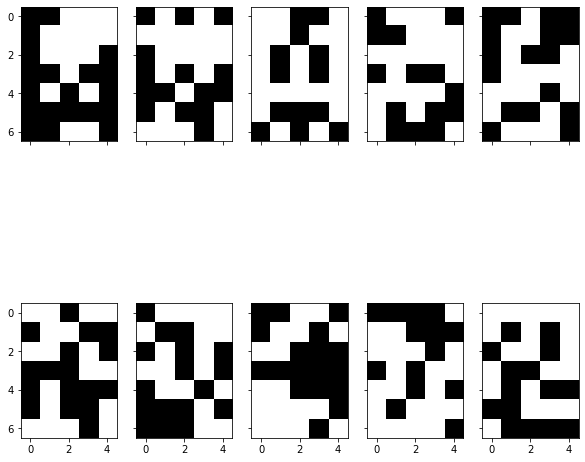

In [24]:
net.show(damaged40)

In [25]:
net.predict(damaged40)

[array([ 1, -1,  1,  1, -1, -1, -1, -1, -1,  1]),
 array([ 1, -1,  1,  1, -1, -1, -1,  1, -1,  1]),
 array([-1, -1,  1,  1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1]),
 array([ 1, -1,  1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1,  1,  1])]

In [26]:
net.misclassified(damaged40,y)

27